## Projeto - Machine Learning para prever ações - Victor Tintel

<p> Vou criar um modelo preditivo completo para prever o preço de ações
    
<p> Para visualizar o código de uma determinada ação ou criptomoeda basta acessar o site https://br.financas.yahoo.com/    

In [3]:
!pip3 install yfinance

     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ------------------------ --------------- 1.8/3.0 MB 10.1 MB/s eta 0:00:01
     ---------------------------------------- 3.0/3.0 MB 7.4 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for peewee: filename=peewee-3.17.9-py3-none-any.whl size=139127 sha256=8f6520e7bde085a50f7e61f70543d5a7b60377b1bfd17f69981b91f17edabb58
  Stored in directory: c:\users\pichau\appdata\local\pip\cache\wheels\43\ef\2d\2c51d496bf084945ffdf838b4cc8767b8ba1cc20eb41588831
Successfully built peewee


In [5]:
#importando a biblioteca do YahooFinance para baixar cotações
#Caso não tenha instalado ainda esse pacote, basta digitar !pip3 install yfinance
import yfinance as yF 

# Imports para manipulação de dados
#import numpy as np
import pandas as pd

# Imports para visualização
import matplotlib.pyplot as plt
%matplotlib inline


# Importando os pacotes para o modelo preditivo
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score



#formatando valores com duas casas decimais
pd.options.display.float_format = '{:.2f}'.format

import warnings
warnings.filterwarnings("ignore")

In [7]:
# Carrega o dataset
Cotacoes = yF.Ticker("ITUB3.SA")

# Opções de períodos 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y e ytd.
dados = Cotacoes.history(period="5y")
dados.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-04-17 00:00:00-03:00,17.29,17.61,16.54,16.97,1062820,0.00,0.00
2020-04-20 00:00:00-03:00,16.78,17.00,16.53,16.89,768020,0.00,0.00
2020-04-22 00:00:00-03:00,16.89,17.11,16.58,16.71,795300,0.00,0.00
2020-04-23 00:00:00-03:00,16.94,17.04,16.29,16.29,1000670,0.00,0.00
2020-04-24 00:00:00-03:00,16.14,16.22,15.15,15.71,1856140,0.00,0.00


In [9]:
# Retirar o indice do campo data

dados.reset_index(inplace=True)
dados.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-04-17 00:00:00-03:00,17.29,17.61,16.54,16.97,1062820,0.00,0.00
1,2020-04-20 00:00:00-03:00,16.78,17.00,16.53,16.89,768020,0.00,0.00
2,2020-04-22 00:00:00-03:00,16.89,17.11,16.58,16.71,795300,0.00,0.00
3,2020-04-23 00:00:00-03:00,16.94,17.04,16.29,16.29,1000670,0.00,0.00
4,2020-04-24 00:00:00-03:00,16.14,16.22,15.15,15.71,1856140,0.00,0.00


In [11]:
dados.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
1240,2025-04-11 00:00:00-03:00,28.06,28.38,27.78,28.15,376900,0.00,0.00
1241,2025-04-14 00:00:00-03:00,28.45,28.60,28.25,28.53,312300,0.00,0.00
1242,2025-04-15 00:00:00-03:00,28.39,28.81,28.35,28.75,372100,0.00,0.00
1243,2025-04-16 00:00:00-03:00,28.60,28.76,28.48,28.66,361000,0.00,0.00
1244,2025-04-17 00:00:00-03:00,28.62,28.72,28.40,28.67,328200,0.00,0.00


In [13]:
## Esse é um comando se no caso quiser deletar por exemplo a última linha.
## dados.drop(dados.tail(1).index,inplace=True)
## dados.tail()

In [15]:
# Vou excluir as colunas que não serão utilizadas e renomear os campos

dados.drop('Dividends', axis=1, inplace=True)
dados.drop('Stock Splits', axis=1, inplace=True)
dados.columns = ['Data','Abertura','Maximo','Minimo','Fechamento','Volume']
dados.head()

,Data,Abertura,Maximo,Minimo,Fechamento,Volume
0,2020-04-17 00:00:00-03:00,17.29,17.61,16.54,16.97,1062820
1,2020-04-20 00:00:00-03:00,16.78,17.00,16.53,16.89,768020
2,2020-04-22 00:00:00-03:00,16.89,17.11,16.58,16.71,795300
3,2020-04-23 00:00:00-03:00,16.94,17.04,16.29,16.29,1000670
4,2020-04-24 00:00:00-03:00,16.14,16.22,15.15,15.71,1856140


In [17]:
# Vou observar o nosso range de dados

print('Menor data: ', dados['Data'].min())
print('Maior data:', dados['Data'].max())

Menor data:  2020-04-17 00:00:00-03:00
Maior data: 2025-04-17 00:00:00-03:00


In [19]:
# Vou observar os dados referente a ultima data do conjunto de dados

display(dados.loc[dados.index.max()])

Data          2025-04-17 00:00:00-03:00
Abertura                          28.62
Maximo                            28.72
Minimo                            28.40
Fechamento                        28.67
Volume                           328200
Name: 1244, dtype: object

In [21]:
# Tipos de Dados

dados.dtypes

Data          datetime64[ns, America/Sao_Paulo]
Abertura                                float64
Maximo                                  float64
Minimo                                  float64
Fechamento                              float64
Volume                                    int64
dtype: object

In [23]:
# Volume de dados

dados.shape

(1245, 6)

In [25]:
# Sumário estatístico

dados.describe()

,Abertura,Maximo,Minimo,Fechamento,Volume
count,1245.00,1245.00,1245.00,1245.00,1245.00
mean,20.64,20.87,20.41,20.64,809002.06
std,3.71,3.71,3.71,3.72,625191.05
min,15.10,15.23,15.01,15.09,118800.00
25%,17.69,17.91,17.48,17.70,457710.00
50%,19.51,19.73,19.29,19.49,658130.00
75%,23.90,24.11,23.69,23.92,979330.00
max,29.17,29.22,28.80,29.04,10778570.00


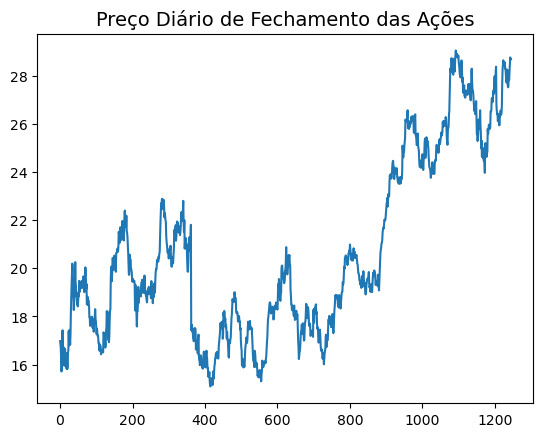

In [27]:
# Plot

plt.plot(dados["Fechamento"])
plt.title("Preço Diário de Fechamento das Ações", size = 14)
plt.show()

In [29]:
dados.head()

,Data,Abertura,Maximo,Minimo,Fechamento,Volume
0,2020-04-17 00:00:00-03:00,17.29,17.61,16.54,16.97,1062820
1,2020-04-20 00:00:00-03:00,16.78,17.00,16.53,16.89,768020
2,2020-04-22 00:00:00-03:00,16.89,17.11,16.58,16.71,795300
3,2020-04-23 00:00:00-03:00,16.94,17.04,16.29,16.29,1000670
4,2020-04-24 00:00:00-03:00,16.14,16.22,15.15,15.71,1856140


In [33]:
# Engenharia de atributos: vou criar campos novos no DF a partir dos campos que existem.
# Criando novos campos de Média Movel com 5 Dias, 14 Dias e 21 Dias.

dados['mm5d'] = dados['Fechamento'].rolling(5).mean()
dados['mm14d'] = dados['Fechamento'].rolling(14).mean()
dados['mm21d'] = dados['Fechamento'].rolling(21).mean()

In [35]:
dados.head(30)

,Data,Abertura,Maximo,Minimo,Fechamento,Volume,mm5d,mm14d,mm21d
0,2020-04-17 00:00:00-03:00,17.29,17.61,16.54,16.97,1062820,NaN,NaN,NaN
1,2020-04-20 00:00:00-03:00,16.78,17.00,16.53,16.89,768020,NaN,NaN,NaN
2,2020-04-22 00:00:00-03:00,16.89,17.11,16.58,16.71,795300,NaN,NaN,NaN
3,2020-04-23 00:00:00-03:00,16.94,17.04,16.29,16.29,1000670,NaN,NaN,NaN
4,2020-04-24 00:00:00-03:00,16.14,16.22,15.15,15.71,1856140,16.52,NaN,NaN
5,2020-04-27 00:00:00-03:00,16.11,16.41,15.68,15.90,1055890,16.30,NaN,NaN
6,2020-04-28 00:00:00-03:00,16.33,17.41,16.32,17.24,1241680,16.37,NaN,NaN
7,2020-04-29 00:00:00-03:00,17.37,17.82,17.24,17.42,672210,16.51,NaN,NaN
8,2020-04-30 00:00:00-03:00,17.00,17.19,16.83,16.87,1047530,16.63,NaN,NaN
9,2020-05-04 00:00:00-03:00,16.40,16.42,16.18,16.18,816640,16.72,NaN,NaN


In [37]:
dados.dropna(inplace=True)

In [39]:
dados.shape

(1225, 9)

In [43]:
qtd_linhas = len(dados)
qtd_linhas_treino = qtd_linhas - 400
qtd_linhas_teste = qtd_linhas - 20

qtd_linhas_validacao = qtd_linhas_treino - qtd_linhas_teste

info = (
    f"linhas treino = 0:{qtd_linhas_treino}"
    f" linhas teste = 0:{qtd_linhas_treino}:{qtd_linhas_teste}"
    f" linhas validacao = 0:{qtd_linhas_teste}:{qtd_linhas}"

)

info

'linhas treino = 0:825 linhas teste = 0:825:1205 linhas validacao = 0:1205:1225'

In [47]:
# Separando variáveis PREDITORAS e variável ALVO

preditoras = dados.drop(columns=['Data', 'Fechamento', 'Volume'])
target = dados['Fechamento']

In [49]:
preditoras.head()

,Abertura,Maximo,Minimo,mm5d,mm14d,mm21d
20,16.49,16.53,15.81,16.10,16.37,16.42
21,16.07,16.07,15.74,16.09,16.26,16.37
22,15.91,16.59,15.91,16.09,16.24,16.36
23,16.55,16.93,16.16,16.24,16.27,16.35
24,17.26,17.43,16.96,16.44,16.31,16.40


In [51]:
preditoras.tail()

,Abertura,Maximo,Minimo,mm5d,mm14d,mm21d
1240,28.06,28.38,27.78,27.80,27.96,28.08
1241,28.45,28.60,28.25,28.01,27.96,28.12
1242,28.39,28.81,28.35,28.25,27.99,28.15
1243,28.60,28.76,28.48,28.38,28.01,28.16
1244,28.62,28.72,28.40,28.55,28.06,28.16


In [53]:
# Normalizando os dados

scaler = MinMaxScaler().fit(preditoras)
preditoras_normalizadas = scaler.transform(preditoras)

In [55]:
# Verificando a normalização realizada

print('Preditoras: ', preditoras_normalizadas.shape)
print(preditoras_normalizadas)

Preditoras:  (1225, 6)
[[0.09871609 0.09244546 0.0582146  0.06464655 0.07551175 0.07050286]
 [0.06874342 0.05953646 0.05265193 0.06352433 0.06743013 0.06665212]
 [0.05784462 0.09683312 0.06544535 0.06374884 0.06541997 0.06520112]
 ...
 [0.94441762 0.97091507 0.96745935 0.9533496  0.94555264 0.96605775]
 [0.95933994 0.96733922 0.97688799 0.96286109 0.94746775 0.96688769]
 [0.96076114 0.96447842 0.97108572 0.97544554 0.9506659  0.96702679]]


In [57]:
# Separando dados para treino e teste

X_Train = preditoras_normalizadas[:qtd_linhas_treino]
X_test = preditoras_normalizadas[qtd_linhas_treino:qtd_linhas_teste]

Y_Train = target[:qtd_linhas_treino]
Y_test = target[qtd_linhas_treino:qtd_linhas_teste]

print(len(X_Train), len(Y_Train))
print(len(X_test), len(Y_test))

825 825
380 380


In [59]:
# Treinamento usando regressão linear

lr = linear_model.LinearRegression()
lr.fit(X_Train, Y_Train )
predicao = lr.predict(X_test)
cd = r2_score(Y_test, predicao)

f'Coeficiente de determinação:{cd * 100:.2f}'

#Lembrete: Coeficiente de determinação determina a aproximação da linha de regressão.
# Quanto mais próximo de 1 melhor.

'Coeficiente de determinação:99.80'

In [61]:
# Treinamento usando regressão linear

rn = MLPRegressor(max_iter = 2000)
rn.fit(X_Train, Y_Train )
predicao = rn.predict(X_test)
cd = rn.score(X_test,Y_test)

f'Coeficiente de determinação:{cd * 100:.2f}'

#Lembrete: Coeficiente de determinação determina a aproximação da linha de regressão.
# Quanto mais próximo de 1 melhor.

'Coeficiente de determinação:45.44'

In [63]:
# Executando a previsão

previsao = preditoras_normalizadas[qtd_linhas_teste:qtd_linhas]
data_pregao_full = dados['Data']
data_pregao = data_pregao_full[qtd_linhas_teste:qtd_linhas]

res_full = dados['Fechamento']
res = res_full[qtd_linhas_teste:qtd_linhas]

pred = lr.predict(previsao)

df = pd.DataFrame({'Data_Pregão':data_pregao, 'Real': res, 'Previsão':pred})

df.set_index('Data_Pregão', inplace = True)

df

,Real,Previsão
Data_Pregão,,
2025-03-21 00:00:00-03:00,28.41,28.41
2025-03-24 00:00:00-03:00,28.44,28.35
2025-03-25 00:00:00-03:00,28.54,28.81
2025-03-26 00:00:00-03:00,28.29,28.41
2025-03-27 00:00:00-03:00,28.30,28.26
2025-03-28 00:00:00-03:00,28.07,28.01
2025-03-31 00:00:00-03:00,27.72,27.68
2025-04-01 00:00:00-03:00,27.71,27.68
2025-04-02 00:00:00-03:00,27.90,27.74


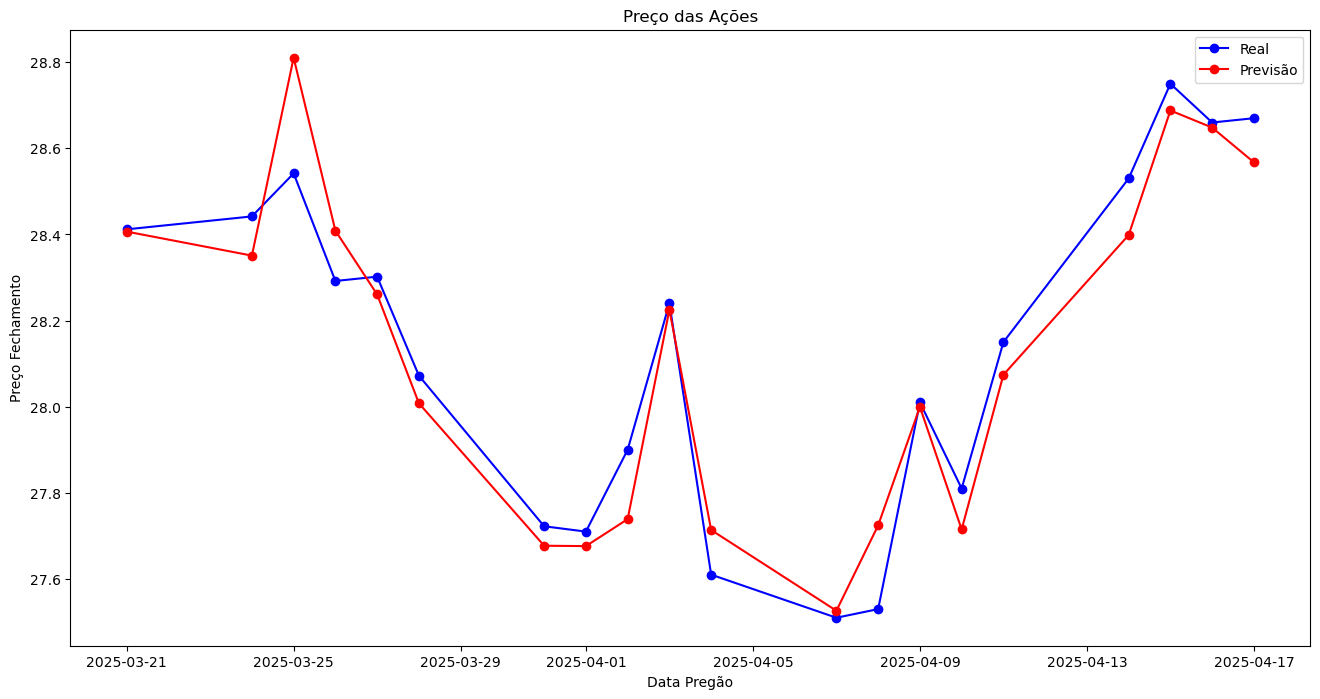

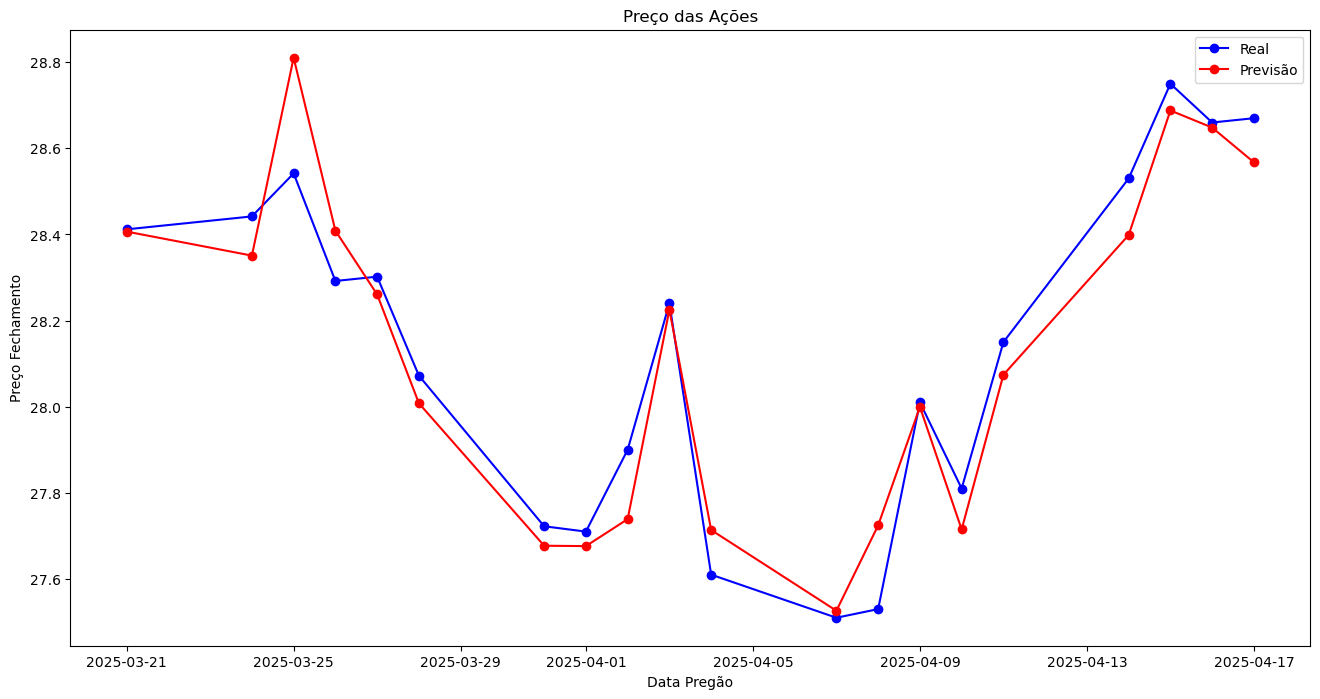

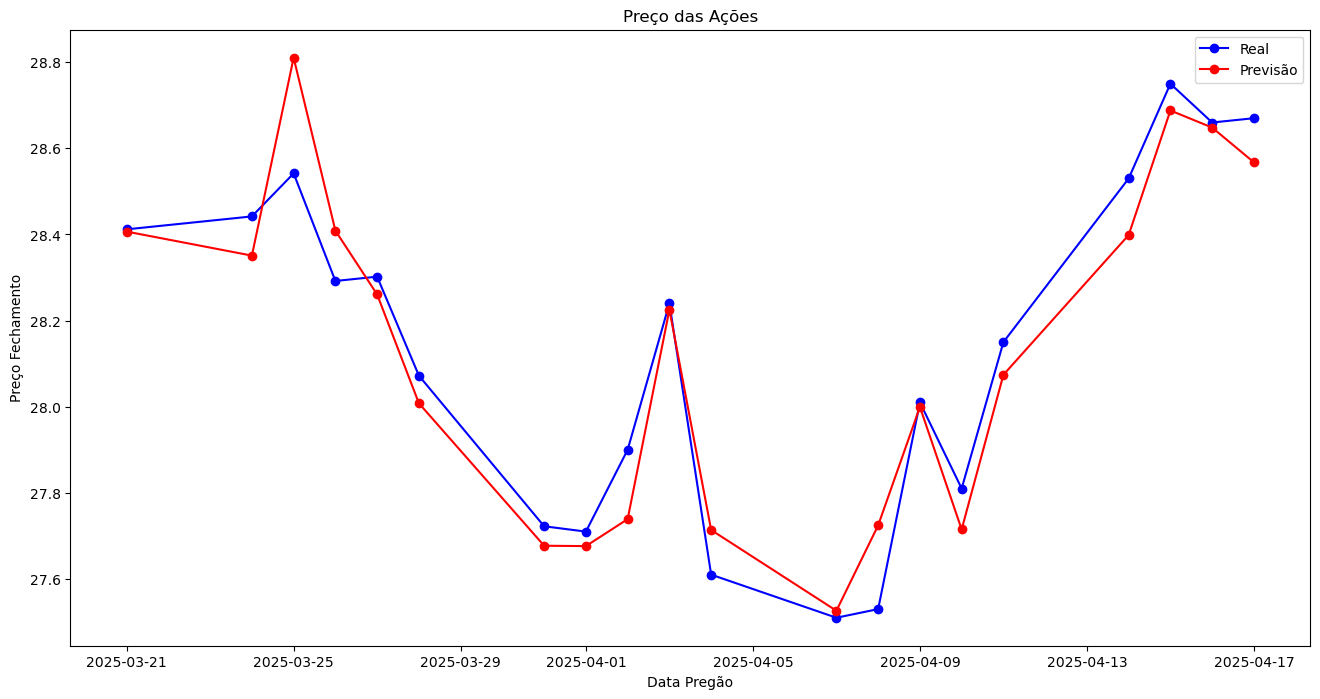

In [71]:
# Gerando o Gráfico

plt.figure(figsize = (16,8))
plt.title('Preço das Ações')
plt.plot(df['Real'], label = 'Real', color = 'blue', marker = 'o')
plt.plot(df['Previsão'], label = 'Previsão', color = 'red', marker = 'o')
plt.xlabel('Data Pregão')
plt.ylabel('Preço Fechamento')
leg = plt.legend() 
plt.show() 